In [180]:
!pip install networkx


In [181]:
import pandas as pd
pd.set_option('display.width', 1000)
df= pd.read_csv(r'C:\Users\haris\dataset.csv')

In [182]:
df.head()

,id,title,genre,original_language,overview,popularity,release_date,vote_average,vote_count
0,278,The Shawshank Redemption,"Drama,Crime",en,Framed in the 1940s for the double murder of h...,94.075,1994-09-23,8.7,21862
1,19404,Dilwale Dulhania Le Jayenge,"Comedy,Drama,Romance",hi,"Raj is a rich, carefree, happy-go-lucky second...",25.408,1995-10-19,8.7,3731
2,238,The Godfather,"Drama,Crime",en,"Spanning the years 1945 to 1955, a chronicle o...",90.585,1972-03-14,8.7,16280
3,424,Schindler's List,"Drama,History,War",en,The true story of how businessman Oskar Schind...,44.761,1993-12-15,8.6,12959
4,240,The Godfather: Part II,"Drama,Crime",en,In the continuing saga of the Corleone crime f...,57.749,1974-12-20,8.6,9811


In [186]:
df.describe()

,id,popularity,vote_average,vote_count
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,161243.505000,34.697267,6.621150,1547.309400
std,211422.046043,211.684175,0.766231,2648.295789
min,5.000000,0.600000,4.600000,200.000000
25%,10127.750000,9.154750,6.100000,315.000000
50%,30002.500000,13.637500,6.600000,583.500000
75%,310133.500000,25.651250,7.200000,1460.000000
max,934761.000000,10436.917000,8.700000,31917.000000


In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 10000 non-null  int64  
 1   title              10000 non-null  object 
 2   genre              9997 non-null   object 
 3   original_language  10000 non-null  object 
 4   overview           9987 non-null   object 
 5   popularity         10000 non-null  float64
 6   release_date       10000 non-null  object 
 7   vote_average       10000 non-null  float64
 8   vote_count         10000 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 703.3+ KB


In [190]:
df.isnull().sum()

id                    0
title                 0
genre                 3
original_language     0
overview             13
popularity            0
release_date          0
vote_average          0
vote_count            0
dtype: int64

In [192]:
df.columns

Index(['id', 'title', 'genre', 'original_language', 'overview', 'popularity', 'release_date', 'vote_average', 'vote_count'], dtype='object')

In [194]:
df=df[[ 'id','title', 'overview', 'genre']]

In [196]:
df

,id,title,overview,genre
0,278,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,"Drama,Crime"
1,19404,Dilwale Dulhania Le Jayenge,"Raj is a rich, carefree, happy-go-lucky second...","Comedy,Drama,Romance"
2,238,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...","Drama,Crime"
3,424,Schindler's List,The true story of how businessman Oskar Schind...,"Drama,History,War"
4,240,The Godfather: Part II,In the continuing saga of the Corleone crime f...,"Drama,Crime"
...,...,...,...,...
9995,10196,The Last Airbender,"The story follows the adventures of Aang, a yo...","Action,Adventure,Fantasy"
9996,331446,Sharknado 3: Oh Hell No!,The sharks take bite out of the East Coast whe...,"Action,TV Movie,Science Fiction,Comedy,Adventure"
9997,13995,Captain America,"During World War II, a brave, patriotic Americ...","Action,Science Fiction,War"
9998,2312,In the Name of the King: A Dungeon Siege Tale,A man named Farmer sets out to rescue his kidn...,"Adventure,Fantasy,Action,Drama"


In [222]:
df = df[['title', 'genre', 'overview']]

In [224]:
df

,title,genre,overview
0,The Shawshank Redemption,"Drama,Crime",Framed in the 1940s for the double murder of h...
1,Dilwale Dulhania Le Jayenge,"Comedy,Drama,Romance","Raj is a rich, carefree, happy-go-lucky second..."
2,The Godfather,"Drama,Crime","Spanning the years 1945 to 1955, a chronicle o..."
3,Schindler's List,"Drama,History,War",The true story of how businessman Oskar Schind...
4,The Godfather: Part II,"Drama,Crime",In the continuing saga of the Corleone crime f...
...,...,...,...
9995,The Last Airbender,"Action,Adventure,Fantasy","The story follows the adventures of Aang, a yo..."
9996,Sharknado 3: Oh Hell No!,"Action,TV Movie,Science Fiction,Comedy,Adventure",The sharks take bite out of the East Coast whe...
9997,Captain America,"Action,Science Fiction,War","During World War II, a brave, patriotic Americ..."
9998,In the Name of the King: A Dungeon Siege Tale,"Adventure,Fantasy,Action,Drama",A man named Farmer sets out to rescue his kidn...


In [226]:
df.columns = ['head','relation','tail']

In [228]:
df

,head,relation,tail
0,The Shawshank Redemption,"Drama,Crime",Framed in the 1940s for the double murder of h...
1,Dilwale Dulhania Le Jayenge,"Comedy,Drama,Romance","Raj is a rich, carefree, happy-go-lucky second..."
2,The Godfather,"Drama,Crime","Spanning the years 1945 to 1955, a chronicle o..."
3,Schindler's List,"Drama,History,War",The true story of how businessman Oskar Schind...
4,The Godfather: Part II,"Drama,Crime",In the continuing saga of the Corleone crime f...
...,...,...,...
9995,The Last Airbender,"Action,Adventure,Fantasy","The story follows the adventures of Aang, a yo..."
9996,Sharknado 3: Oh Hell No!,"Action,TV Movie,Science Fiction,Comedy,Adventure",The sharks take bite out of the East Coast whe...
9997,Captain America,"Action,Science Fiction,War","During World War II, a brave, patriotic Americ..."
9998,In the Name of the King: A Dungeon Siege Tale,"Adventure,Fantasy,Action,Drama",A man named Farmer sets out to rescue his kidn...


In [230]:
df.columns

Index(['head', 'relation', 'tail'], dtype='object')

In [232]:
df = df.dropna()

In [234]:
print(df.dtypes)

head        object
relation    object
tail        object
dtype: object


In [236]:
def label_to_id(df):
  # we use set to make our list of entities/relations unique
  # set is an unordered
  entities = set(df['head'].tolist())
  entities.update(df['tail'].tolist())
  relations = set(df['relation'].tolist())

  print(f'There are {len(entities)} entities and {len(relations)} relations.')
  entities = set(str(entity) for entity in entities)
  relations= set(str(relation) for relation in relations)
  # label_dict = {int: string}, where int contains the entity id and string is the original label
  label2id_dict = {label: idx for idx, label in enumerate(sorted(entities))}

  # we extend label_dict to also include relations
  for idx, label in enumerate(sorted(relations)):
    # if we have 10 entities, idx assigned to relations will be from 10 onwards
    label2id_dict[label] = idx+len(entities)

  #Now let's convert our original triples to store ids instead of strings
  triples = []

  # we use label2id_dict to retrieve the assigned id given the entity name
  for index, row in df.iterrows():
    triples.append((label2id_dict[row['head']], label2id_dict[row['relation']], label2id_dict[row['tail']]))

  print(f'There are {len(triples)} triples.')

  return (label2id_dict, triples)

label2id_dict, triples = label_to_id(df)

There are 19629 entities and 2123 relations.
There are 9985 triples.


In [28]:
triples

[(16137, 20709, 7295),
 (6035, 20447, 12648),
 (15206, 20709, 13910),
 (13228, 20770, 17067),
 (15207, 20709, 8980),
 (8485, 20990, 10782),
 (13952, 20292, 2292),
 (19540, 21397, 2050),
 (6171, 21372, 12905),
 (19543, 21373, 8121),
 (45, 20650, 16603),
 (7495, 21365, 3503),
 (12109, 20563, 3121),
 (15256, 21104, 1955),
 (7496, 21365, 12507),
 (14931, 20658, 4271),
 (15224, 21722, 19151),
 (12541, 21595, 625),
 (15623, 20092, 3717),
 (7497, 21377, 16675),
 (7211, 20447, 1373),
 (5335, 20823, 947),
 (13477, 19818, 1738),
 (7717, 20709, 17054),
 (18222, 20323, 3864),
 (10232, 20415, 2042),
 (11858, 20709, 959),
 (7905, 19825, 6195),
 (12533, 21219, 18906),
 (9688, 20253, 19296),
 (317, 20431, 16756),
 (7753, 20259, 8995),
 (11882, 20650, 1562),
 (6945, 20650, 2033),
 (6670, 20183, 8972),
 (13942, 19639, 11008),
 (5351, 20709, 4941),
 (8208, 20650, 2522),
 (476, 20253, 13598),
 (8241, 21376, 11910),
 (8298, 21075, 18596),
 (11438, 20693, 16863),
 (15043, 19966, 16617),
 (14207, 20650, 1163

In [29]:
# id2label_dict = {string: int}
id2label_dict = dict((v,k) for k,v in label2id_dict.items())
godfather_id = label2id_dict['The Godfather']
print(f'The Godfather : {godfather_id}')

The Godfather : 15206


In [30]:
#creation of graph
import networkx as nx

# Define graph as a directed graph
G = nx.DiGraph()

# Add each triple into the graph
for head, relation, tail in triples:
  # each edge is labeled with the relation
  G.add_edge(head, tail, label=relation)

In [31]:
#Let's see what graph contain's
print(f'Total number of entities: {int(G.number_of_nodes())}')
print(f'Total number of edges: {int(G.number_of_edges())}')

# functions below return iterators
entities = list(G.nodes())
relations = list(G.edges())

print(f'Entities: {len(entities)}')
print(f'Edges: {len(relations)}')

Total number of entities: 19629
Total number of edges: 9984
Entities: 19629
Edges: 9984


In [32]:
#Basic network analysis
degrees = dict(G.degree())

print(f'First 10 entities: {entities[:10]}')
print(f'First 10 edges: {relations[:10]}')


print(f'Degree for all nodes: {list(degrees.items())[:10]}')

in_degree = dict(G.in_degree())
print(f'In-degree of {id2label_dict[godfather_id]}: {in_degree[godfather_id]}')
print(f'In-degree of The Godfatheer (single node): {G.in_degree(15206)}')


First 10 entities: [16137, 7295, 6035, 12648, 15206, 13910, 13228, 17067, 15207, 8980]
First 10 edges: [(16137, 7295), (6035, 12648), (15206, 13910), (13228, 17067), (15207, 8980), (8485, 10782), (13952, 2292), (19540, 2050), (6171, 12905), (19543, 8121)]
Degree for all nodes: [(16137, 1), (7295, 1), (6035, 1), (12648, 1), (15206, 1), (13910, 1), (13228, 1), (17067, 1), (15207, 1), (8980, 1)]
In-degree of The Godfather: 0
In-degree of The Godfatheer (single node): 0


In [33]:
id2label_dict[1000]

"A gambling addict faces a conflict when entrusted with keeping a bunch of money that isn't his."

id2label_dict

In [35]:
id2label_dict

{0: '"Barbie" stars as Clara in this animated retelling of the classic Christmas ballet, complete with Tchaikovsky soundtrack and ballet choreography.',
 1: '"Dirty" Harry Callahan is a San Francisco Police Inspector on the trail of a group of rogue cops who have taken justice into their own hands. When shady characters are murdered one after another in grisly fashion, only Dirty Harry can stop them.',
 2: '"Loro", in two parts, is a period movie that chronicles, as a fiction story, events likely happened in Italy (or even made up) between 2006 and 2010.  "Loro" wants to suggest in portraits and glimps, through a composite constellation of characters, a moment in history, now definitively ended, which can be described in a very summary picture of the events as amoral, decadent but extraordinarily alive.  Additionally, "Loro" wishes to tell the story of some Italians, fresh and ancient people at the same time: souls from a modern imaginary Purgatory who, moved by heterogeneous intents l

In [36]:
out_degree = dict(G.out_degree())
print(f'Out-degree of The Godfather: {out_degree[godfather_id]}')
print(f'Name entities connected directly to {id2label_dict[godfather_id]}: ')

godfather_neighbors = []
for neighbor in list(G.neighbors(godfather_id)):
  print(f'\t{neighbor}: {id2label_dict[neighbor]}')
  godfather_neighbors.append(neighbor)

# Because we have a directed graph, calling G.neighbors only returns the outgoing edges from our reference node.
# The reverse of a DiGraph returns the inverted egdes.
reverseG = G.reverse(copy=True)
for neighbor in list(reverseG.neighbors(godfather_id)):
  print(f'\t{neighbor}: {id2label_dict[neighbor]}')
  godfather_neighbors.append(neighbor)

Out-degree of The Godfather: 1
Name entities connected directly to The Godfather: 
	13910: Spanning the years 1945 to 1955, a chronicle of the fictional Italian-American Corleone crime family. When organized crime family patriarch, Vito Corleone barely survives an attempt on his life, his youngest son, Michael steps in to take care of the would-be killers, launching a campaign of bloody revenge.


In [37]:
#computing ava. degree
avg_degree = sum(degrees.values())/len(entities)
print(f'Average Degree: {avg_degree:0.2f}')

Average Degree: 1.02


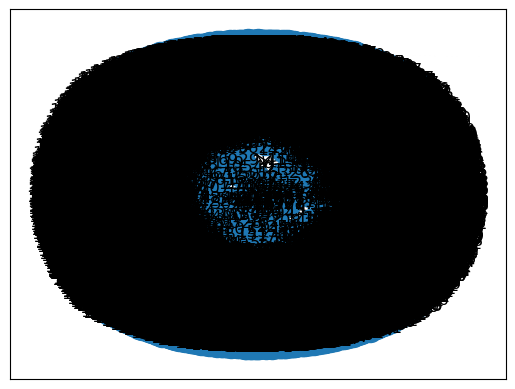

In [38]:
#Visualization
import matplotlib.pyplot as plt
%matplotlib inline

pos = nx.spring_layout(G, k=0.05, seed=42)
nx.draw_networkx(G, pos, with_labels = True)

In [39]:
def draw_subgraph(subgraph_G, with_labels=False):
  pos = nx.spring_layout(subgraph_G, seed=333)
  plt.figure()

  node_labels = {}
  edge_labels = {}
  if with_labels:
    # retrieve labels from id2label_dict
    node_labels = {node: id2label_dict[node] for node in subgraph_G.nodes()}
    edge_labels = {(h, t): id2label_dict[r['label']] for h, t, r in subgraph_G.edges.data()}
  else:
    node_labels = {node: node for node in subgraph_G.nodes()}
    edge_labels = {(h, t): r['label'] for h, t, r in subgraph_G.edges.data()}

  # draw the nodes
  nx.draw(
      subgraph_G, pos, edge_color='black', width=1, linewidths=1,
      node_size=1000, node_color='red', alpha=0.9,
      labels=node_labels
  )

  # take the edge_labels
  nx.draw_networkx_edge_labels(
      subgraph_G, pos,
      edge_labels=edge_labels,
      font_color='green'
  )
  plt.axis('off')
  plt.show()

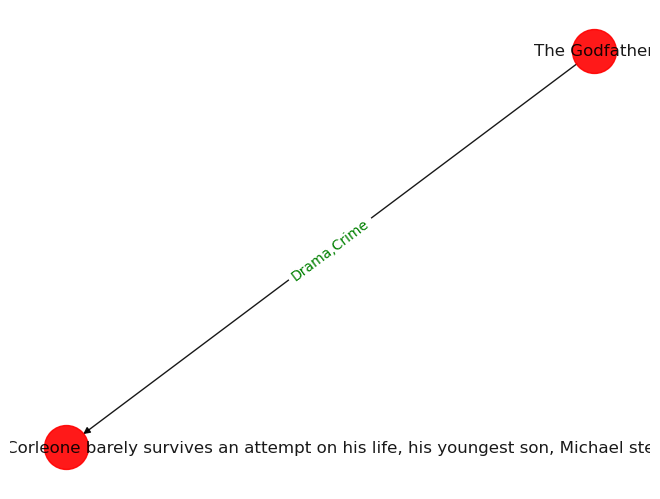

In [40]:
subgraph_ids = godfather_neighbors
subgraph_ids.append(godfather_id) # Don't forget to include Daenerys!
subgraph_G = nx.subgraph(G, subgraph_ids)
draw_subgraph(subgraph_G, with_labels=True)

In [238]:
from sklearn.feature_extraction.text import CountVectorizer

In [240]:
cv=CountVectorizer(max_features=10000, stop_words='english')

In [242]:
vector=cv.fit_transform(df['tail']).toarray()

In [244]:
print(vector)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [246]:
from sklearn.metrics.pairwise import cosine_similarity

In [248]:
similarity=cosine_similarity(vector)

In [249]:
similarity

array([[1.        , 0.03030303, 0.02901294, ..., 0.0836242 , 0.08444007,
        0.03481553],
       [0.03030303, 1.        , 0.05802589, ..., 0.        , 0.        ,
        0.        ],
       [0.02901294, 0.05802589, 1.        , ..., 0.02668803, 0.0404226 ,
        0.        ],
       ...,
       [0.0836242 , 0.        , 0.02668803, ..., 1.        , 0.        ,
        0.        ],
       [0.08444007, 0.        , 0.0404226 , ..., 0.        , 1.        ,
        0.        ],
       [0.03481553, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [278]:
df[df['head']=="The Shawshank Redemption"].index[0]

0

In [260]:
distance = sorted(list(enumerate(similarity[2])), reverse=True, key=lambda vector:vector[1])
for i in distance[0:5]:
    print(df.iloc[i[0]]['head'])

The Godfather
The Godfather: Part II
Kind Hearts and Coronets
Sinister
Still Walking


In [262]:
def recommand(movies):
    new_data = df  # Define new_data as the df DataFrame
    index=new_data[new_data['head']==movies].index[0]
    distance = sorted(list(enumerate(similarity[index])), reverse=True, key=lambda vector:vector[1])
    for i in distance[0:5]:
        print(df.iloc[i[0]]['head'])

In [268]:
recommand("Iron Man")

Iron Man
Clown
Iron Man 2
The Wizards Return: Alex vs. Alex
G.O.R.A.


In [129]:
import pickle

In [131]:
pickle.dump(df, open('movies_list.pkl', 'wb'))

In [133]:
pickle.dump(similarity, open('similarity.pkl', 'wb'))

In [134]:
pickle.load(open('movies_list.pkl', 'rb'))

,head,relation,tail
0,The Shawshank Redemption,"Drama,Crime",Framed in the 1940s for the double murder of h...
1,Dilwale Dulhania Le Jayenge,"Comedy,Drama,Romance","Raj is a rich, carefree, happy-go-lucky second..."
2,The Godfather,"Drama,Crime","Spanning the years 1945 to 1955, a chronicle o..."
3,Schindler's List,"Drama,History,War",The true story of how businessman Oskar Schind...
4,The Godfather: Part II,"Drama,Crime",In the continuing saga of the Corleone crime f...
...,...,...,...
9995,The Last Airbender,"Action,Adventure,Fantasy","The story follows the adventures of Aang, a yo..."
9996,Sharknado 3: Oh Hell No!,"Action,TV Movie,Science Fiction,Comedy,Adventure",The sharks take bite out of the East Coast whe...
9997,Captain America,"Action,Science Fiction,War","During World War II, a brave, patriotic Americ..."
9998,In the Name of the King: A Dungeon Siege Tale,"Adventure,Fantasy,Action,Drama",A man named Farmer sets out to rescue his kidn...
